# date and time date types and tools

In [190]:
import datetime
import dateutil.parser as dateparser
import pandas as pd
import numpy as np
import pytz
%matplotlib inline

In [2]:
now = datetime.datetime.now()

In [5]:
now.year,now.month,now.day,now.hour,now.minute # 没有括号的tuple

(2018, 5, 5, 8, 21)

In [6]:
delta = datetime.datetime(2018,5,5) - datetime.datetime(2012,6,24,12,15,37)

In [12]:
datetime.datetime(2018,5,5) # 没有写时间的情况下就是0点0分

datetime.datetime(2018, 5, 5, 0, 0)

In [8]:
delta.days

2140

In [11]:
delta.seconds

42263

In [16]:
start = datetime.datetime(2018,5,5)
start + datetime.timedelta(12,1*60*60,0)

datetime.datetime(2018, 5, 17, 1, 0)

In [17]:
str(now)

'2018-05-05 08:21:22.086635'

In [25]:
now.strftime('%Y-%y/%m/%d:%H-%I/%M/%S/%w/%U/%W/%z/%F/  %D')

'2018-18/05/05:08-08/21/22/6/17/18//2018-05-05/  05/05/18'

In [22]:
value = '2011-01-03'
datetime.datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [26]:
datestrs = ['7/6/11','8/6/11']
[datetime.datetime.strptime(x,'%m/%d/%y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [28]:
dateparser.parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [31]:
dateparser.parse('Jan 31,1997 10:45 pm')

datetime.datetime(2018, 1, 31, 22, 45)

In [34]:
dateparser.parse('11-01-03',dayfirst = False)

datetime.datetime(2003, 11, 1, 0, 0)

In [37]:
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [41]:
idx =  pd.to_datetime(datestrs + [None])
idx[idx.isnull()]

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

# time series basics

In [43]:
date = [datetime.datetime(2011,1,x) for x in [2,5,7,8,10,12]]
ts = pd.Series(np.random.randn(6),index = date)

In [44]:
ts

2011-01-02    0.448099
2011-01-05    0.889775
2011-01-07   -0.719308
2011-01-08   -0.646003
2011-01-10   -0.769982
2011-01-12   -2.515503
dtype: float64

In [46]:
ts + ts[::2] # 按照相同索引的一起加

2011-01-02    0.896197
2011-01-05         NaN
2011-01-07   -1.438617
2011-01-08         NaN
2011-01-10   -1.539964
2011-01-12         NaN
dtype: float64

In [47]:
ts.index[1]

Timestamp('2011-01-05 00:00:00')

In [49]:
ts[pd.Timestamp('2011-01-05 00:00:00')]

0.88977529747428552

In [55]:
ts['01/10/2011']

-0.76998190664437927

In [56]:
ts2 = pd.Series(np.random.randn(500),
                index = pd.date_range('2016/01/01',periods = 500))

In [69]:
ts2['2016-01']

2016-01-01    0.241359
2016-01-02    0.058156
2016-01-03    0.041845
2016-01-04    1.172483
2016-01-05   -1.311814
2016-01-06   -0.362600
2016-01-07    0.203741
2016-01-08    1.588221
2016-01-09    1.158181
2016-01-10    0.459438
2016-01-11   -0.941463
2016-01-12   -0.017177
2016-01-13   -0.022475
2016-01-14    1.023136
2016-01-15    1.534754
2016-01-16    0.210606
2016-01-17   -0.700045
2016-01-18    1.487969
2016-01-19    0.741284
2016-01-20    0.453485
2016-01-21   -0.334243
2016-01-22   -0.038340
2016-01-23    0.552347
2016-01-24    1.038429
2016-01-25    0.083396
2016-01-26    0.093145
2016-01-27   -0.621012
2016-01-28   -2.267951
2016-01-29   -0.341082
2016-01-30   -1.419163
2016-01-31    1.238071
Freq: D, dtype: float64

In [66]:
ts2['2016/01':'2016/01/05']

2016-01-01    0.241359
2016-01-02    0.058156
2016-01-03    0.041845
2016-01-04    1.172483
2016-01-05   -1.311814
Freq: D, dtype: float64

In [68]:
ts2.truncate(after = '1/9/2016')

2016-01-01    0.241359
2016-01-02    0.058156
2016-01-03    0.041845
2016-01-04    1.172483
2016-01-05   -1.311814
2016-01-06   -0.362600
2016-01-07    0.203741
2016-01-08    1.588221
2016-01-09    1.158181
Freq: D, dtype: float64

In [72]:
date2 = pd.date_range(start = '2018/5/5',periods = 100,freq = 'W-SAT')

In [73]:
date2

DatetimeIndex(['2018-05-05', '2018-05-12', '2018-05-19', '2018-05-26',
               '2018-06-02', '2018-06-09', '2018-06-16', '2018-06-23',
               '2018-06-30', '2018-07-07', '2018-07-14', '2018-07-21',
               '2018-07-28', '2018-08-04', '2018-08-11', '2018-08-18',
               '2018-08-25', '2018-09-01', '2018-09-08', '2018-09-15',
               '2018-09-22', '2018-09-29', '2018-10-06', '2018-10-13',
               '2018-10-20', '2018-10-27', '2018-11-03', '2018-11-10',
               '2018-11-17', '2018-11-24', '2018-12-01', '2018-12-08',
               '2018-12-15', '2018-12-22', '2018-12-29', '2019-01-05',
               '2019-01-12', '2019-01-19', '2019-01-26', '2019-02-02',
               '2019-02-09', '2019-02-16', '2019-02-23', '2019-03-02',
               '2019-03-09', '2019-03-16', '2019-03-23', '2019-03-30',
               '2019-04-06', '2019-04-13', '2019-04-20', '2019-04-27',
               '2019-05-04', '2019-05-11', '2019-05-18', '2019-05-25',
      

In [76]:
df2 = pd.DataFrame(np.random.randn(100,4),index = date2,
                  columns = ['a','b','c','d'])

In [77]:
df2.loc['2018/05']

,a,b,c,d
2018-05-05,2.856470,0.433972,-0.017975,1.976392
2018-05-12,0.321641,-0.680565,0.491282,-0.133855
2018-05-19,0.002209,-1.531450,0.785871,0.433930
2018-05-26,0.732762,0.278280,-0.302580,-1.990325


In [78]:
date3 = pd.DatetimeIndex(['2018/5/5','2018/5/5','2018/5/5','2018/5/6','2018/5/7'])

In [79]:
s3 = pd.Series(np.random.randn(5),index = date3)

In [82]:
s3.index.is_unique

False

In [88]:
s3[s3.groupby(level=0).count() > 1] # 找到重复值了

2018-05-05   -0.723622
2018-05-05   -0.294310
2018-05-05   -1.759992
dtype: float64

# date ranges frequencies shifting

In [91]:
ts4 = ts.resample('D')

In [92]:
ts4

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [95]:
pd.date_range(start = '2018/5/5',end = '2018/5/31')

DatetimeIndex(['2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12',
               '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31'],
              dtype='datetime64[ns]', freq='D')

In [107]:
pd.date_range(end = '2018/5/5',start = '2018/4/5',
             freq = 'WOM-1SAT') # 'B':老外的business day

DatetimeIndex(['2018-04-07', '2018-05-05'], dtype='datetime64[ns]', freq='WOM-1SAT')

In [111]:
pd.date_range(start = '2012-05-02 12:56:31',periods = 5,normalize = True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [116]:
hour = pd.tseries.offsets.Hour(4)
hour + pd.tseries.offsets.Minute(30)

<270 * Minutes>

In [115]:
pd.date_range(start = '2018/5/5 10:46:00',freq = '2h',periods = 10)

DatetimeIndex(['2018-05-05 10:46:00', '2018-05-05 12:46:00',
               '2018-05-05 14:46:00', '2018-05-05 16:46:00',
               '2018-05-05 18:46:00', '2018-05-05 20:46:00',
               '2018-05-05 22:46:00', '2018-05-06 00:46:00',
               '2018-05-06 02:46:00', '2018-05-06 04:46:00'],
              dtype='datetime64[ns]', freq='2H')

In [118]:
ts.shift(2) # 将一列数据往前（负数）、往后移动（正数）

2011-01-02         NaN
2011-01-05         NaN
2011-01-07    0.448099
2011-01-08    0.889775
2011-01-10   -0.719308
2011-01-12   -0.646003
dtype: float64

In [121]:
ts

2011-01-02    0.448099
2011-01-05    0.889775
2011-01-07   -0.719308
2011-01-08   -0.646003
2011-01-10   -0.769982
2011-01-12   -2.515503
dtype: float64

In [122]:
ts.shift(1)

2011-01-02         NaN
2011-01-05    0.448099
2011-01-07    0.889775
2011-01-08   -0.719308
2011-01-10   -0.646003
2011-01-12   -0.769982
dtype: float64

In [120]:
(ts - ts.shift(1)) / ts

2011-01-02         NaN
2011-01-05    0.496391
2011-01-07    2.236987
2011-01-08   -0.113475
2011-01-10    0.161015
2011-01-12    0.693905
dtype: float64

In [124]:
(0.889775 - 0.448099) / 0.889775

0.49639066056025394

In [125]:
ts.shift(2,freq = 'M') # 把所有的index都改为月底了
                       # 有了freq之后就改为平移index了

2011-02-28    0.448099
2011-02-28    0.889775
2011-02-28   -0.719308
2011-02-28   -0.646003
2011-02-28   -0.769982
2011-02-28   -2.515503
dtype: float64

In [128]:
ts.shift(1,freq = 'D') 

2011-01-03    0.448099
2011-01-06    0.889775
2011-01-08   -0.719308
2011-01-09   -0.646003
2011-01-11   -0.769982
2011-01-13   -2.515503
dtype: float64

In [129]:
now = datetime.datetime(2018,5,5)
now + pd.tseries.offsets.Day() * 3

Timestamp('2018-05-08 00:00:00')

In [130]:
now + pd.tseries.offsets.MonthEnd()

Timestamp('2018-05-31 00:00:00')

In [137]:
now + pd.tseries.offsets.MonthEnd(0) == now + pd.tseries.offsets.MonthEnd(1)

True

In [139]:
pd.tseries.offsets.MonthEnd().rollback(now)

Timestamp('2018-04-30 00:00:00')

In [147]:
ts.groupby(pd.tseries.offsets.MonthEnd()).count() # 把当月的个数统计出来,再加上.rollforward结果也是一样的
                                                  # 返回上个月需要再加.rollback
                                                  # 也可以用下面的这个简单方法

2011-01-31    6
dtype: int64

In [146]:
ts.resample('M').count()

2011-01-31    6
Freq: M, dtype: int64

# time zone handling

In [162]:
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [167]:
pd.Series(pytz.common_timezones)[pd.Series(pytz.common_timezones).str.contains('china')]  

Series([], dtype: object)

In [172]:
rng = pd.date_range(start = '3/9/2012 9:30',periods = 6,freq = 'D',
                    tz = 'UTC')
ts5 = pd.Series(np.random.randn(len(rng)),index = rng)
ts5

2012-03-09 09:30:00+00:00   -1.828657
2012-03-10 09:30:00+00:00   -0.394601
2012-03-11 09:30:00+00:00   -0.817523
2012-03-12 09:30:00+00:00   -0.417396
2012-03-13 09:30:00+00:00   -0.542817
2012-03-14 09:30:00+00:00    0.549208
Freq: D, dtype: float64

In [173]:
rng

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [171]:
print(ts5.index.tz)

None


In [177]:
ts5.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [178]:
ts5.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -1.828657
2012-03-10 04:30:00-05:00   -0.394601
2012-03-11 05:30:00-04:00   -0.817523
2012-03-12 05:30:00-04:00   -0.417396
2012-03-13 05:30:00-04:00   -0.542817
2012-03-14 05:30:00-04:00    0.549208
Freq: D, dtype: float64

In [184]:
ts.tz_localize('America/New_York').tz_convert('Europe/Berlin')

2011-01-02 06:00:00+01:00    0.448099
2011-01-05 06:00:00+01:00    0.889775
2011-01-07 06:00:00+01:00   -0.719308
2011-01-08 06:00:00+01:00   -0.646003
2011-01-10 06:00:00+01:00   -0.769982
2011-01-12 06:00:00+01:00   -2.515503
dtype: float64

In [186]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2011-01-02 00:00:00+08:00', '2011-01-05 00:00:00+08:00',
               '2011-01-07 00:00:00+08:00', '2011-01-08 00:00:00+08:00',
               '2011-01-10 00:00:00+08:00', '2011-01-12 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq=None)

In [198]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [194]:
stamp.tz_localize('America/New_York')

Timestamp('2011-03-12 04:00:00-0500', tz='America/New_York')

In [202]:
stamp_utc = stamp.tz_localize('UTC')

In [199]:
stamp.tz_localize('America/New_York') ==  stamp.tz_localize('UTC').tz_convert('America/New_York')  

False

In [201]:
stamp_utc.value

1299902400000000000

In [204]:
stamp_utc.tz_convert('America/New_York').value 

1299902400000000000

In [205]:
stamp2 = pd.Timestamp('2012-03-12 01:30:00',tz = 'US/Eastern')

In [206]:
stamp2

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [208]:
stamp2 + pd.tseries.offsets.Hour() * 2

Timestamp('2012-03-12 03:30:00-0400', tz='US/Eastern')

In [211]:
date6 = pd.date_range('2018/03/07 9:30',periods = 8)

In [212]:
ts = pd.Series(np.random.randn(len(date6)),index = date6)

In [214]:
ts10 = ts[:4].tz_localize('America/New_York')

In [215]:
ts11 = ts[4:].tz_localize('Europe/Moscow')

In [220]:
ts10.index

DatetimeIndex(['2018-03-07 09:30:00-05:00', '2018-03-08 09:30:00-05:00',
               '2018-03-09 09:30:00-05:00', '2018-03-10 09:30:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq='D')

In [219]:
ts11.index 

DatetimeIndex(['2018-03-11 09:30:00+03:00', '2018-03-12 09:30:00+03:00',
               '2018-03-13 09:30:00+03:00', '2018-03-14 09:30:00+03:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='D')

In [221]:
(ts10 + ts11).index # 不一样时区相加之后就变成了UTC时间了。

DatetimeIndex(['2018-03-07 14:30:00+00:00', '2018-03-08 14:30:00+00:00',
               '2018-03-09 14:30:00+00:00', '2018-03-10 14:30:00+00:00',
               '2018-03-11 06:30:00+00:00', '2018-03-12 06:30:00+00:00',
               '2018-03-13 06:30:00+00:00', '2018-03-14 06:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# Periods and period arithmetric

In [7]:
p = pd.Period('2007',freq = 'A-DEC') # 以年为时间间隔，December的最后一天
p

Period('2007', 'A-DEC')

In [6]:
p +5

Period('2012', 'A-DEC')

In [8]:
pd.Period('2018',freq = 'A-DEC') - p # freq 相同，那么就只是数字相加减了
                                     # 如果freq 不相同，那么：就报错

11

In [9]:
pd.Period('2018',freq = 'A-JAN') - p 

IncompatibleFrequency: Input has different freq=A-DEC from Period(freq=A-JAN)

In [11]:
rng = pd.period_range(start = '2018-01-15',end = '2018-5-5',freq = 'M')
rng # 生成的PeriodIndex对象可以被当作axis index 或者其它的pandas data structure使用

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05'], dtype='period[M]', freq='M')

In [13]:
s = pd.Series(np.random.rand(5),index = rng)
s

2018-01    0.127294
2018-02    0.556913
2018-03    0.204896
2018-04    0.279961
2018-05    0.653413
Freq: M, dtype: float64

In [15]:
# 从list生成PeriodIndex
value = ['2017Q1','2017Q2','2018Q3']
pd.PeriodIndex(value,freq = 'Q-DEC')

PeriodIndex(['2017Q1', '2017Q2', '2018Q3'], dtype='period[Q-DEC]', freq='Q-DEC')

In [17]:
p.asfreq('M',how = 'start') # how = 'end' 生成的就是2017年12月了

Period('2007-01', 'M')

In [18]:
p2 = pd.Period('2018','A-JUN')

In [19]:
p2.asfreq('M',how = 'end') 

Period('2018-06', 'M')

In [20]:
p3 = pd.Period('2018-5','M')

In [21]:
p3.asfreq('A-FEB')

Period('2019', 'A-FEB')

In [23]:
s.asfreq('D',how = 'end')

2018-01-31    0.127294
2018-02-28    0.556913
2018-03-31    0.204896
2018-04-30    0.279961
2018-05-31    0.653413
Freq: D, dtype: float64

In [26]:
s.asfreq('A-DEC')

2018    0.127294
2018    0.556913
2018    0.204896
2018    0.279961
2018    0.653413
Freq: A-DEC, dtype: float64

In [27]:
p4 = pd.Period('2012-11',freq = 'Q-OCT')
p4

Period('2013Q1', 'Q-OCT')

In [29]:
p4.asfreq('D',how = 'end')

Period('2013-01-31', 'D')

In [32]:
p4

Period('2013Q1', 'Q-OCT')

In [37]:
p4pm = (p4.asfreq('B',how ='start')).asfreq('T','s') + 16*60

In [38]:
p4pm

Period('2012-11-01 16:00', 'T')

In [39]:
s.index = s.index.to_timestamp()

In [40]:
s

2018-01-01    0.127294
2018-02-01    0.556913
2018-03-01    0.204896
2018-04-01    0.279961
2018-05-01    0.653413
Freq: MS, dtype: float64

In [54]:
s.to_period('D').to_timestamp(how = 'end') 

2018-01-01    0.127294
2018-02-01    0.556913
2018-03-01    0.204896
2018-04-01    0.279961
2018-05-01    0.653413
Freq: MS, dtype: float64

In [56]:
df = pd.read_csv('examples\\macrodata.csv')

In [59]:
df.head(8)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08


In [58]:
index = pd.PeriodIndex(year = df.year,quarter = df.quarter,freq = 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [60]:
df.index = index

# resampling and frequency conversion

In [72]:
ts = pd.Series(np.arange(100),
               index = pd.date_range('2018-5-6',periods = 100,freq = 'D')
              )
ts

2018-05-06     0
2018-05-07     1
2018-05-08     2
2018-05-09     3
2018-05-10     4
2018-05-11     5
2018-05-12     6
2018-05-13     7
2018-05-14     8
2018-05-15     9
2018-05-16    10
2018-05-17    11
2018-05-18    12
2018-05-19    13
2018-05-20    14
2018-05-21    15
2018-05-22    16
2018-05-23    17
2018-05-24    18
2018-05-25    19
2018-05-26    20
2018-05-27    21
2018-05-28    22
2018-05-29    23
2018-05-30    24
2018-05-31    25
2018-06-01    26
2018-06-02    27
2018-06-03    28
2018-06-04    29
              ..
2018-07-15    70
2018-07-16    71
2018-07-17    72
2018-07-18    73
2018-07-19    74
2018-07-20    75
2018-07-21    76
2018-07-22    77
2018-07-23    78
2018-07-24    79
2018-07-25    80
2018-07-26    81
2018-07-27    82
2018-07-28    83
2018-07-29    84
2018-07-30    85
2018-07-31    86
2018-08-01    87
2018-08-02    88
2018-08-03    89
2018-08-04    90
2018-08-05    91
2018-08-06    92
2018-08-07    93
2018-08-08    94
2018-08-09    95
2018-08-10    96
2018-08-11    

In [73]:
ts.resample('M',kind = 'period').max()

2018-05    25
2018-06    55
2018-07    86
2018-08    99
Freq: M, dtype: int32

In [95]:
ts.resample('M',closed = 'right',label = 'right').max().shift(-1) 
# 用这个方法数据往上移动了一行

2018-05-31    55.0
2018-06-30    86.0
2018-07-31    99.0
2018-08-31     NaN
Freq: M, dtype: float64

In [100]:
ts.resample('M',closed = 'right',label = 'right',loffset = '1M').ohlc()
# open:first high:max low: min close: end

,open,high,low,close
2018-06-30,0,25,0,25
2018-07-31,26,55,26,55
2018-08-31,56,86,56,86
2018-09-30,87,99,87,99


In [103]:
ts2 = ts.resample('W-SUN').max()
ts2

2018-05-06     0
2018-05-13     7
2018-05-20    14
2018-05-27    21
2018-06-03    28
2018-06-10    35
2018-06-17    42
2018-06-24    49
2018-07-01    56
2018-07-08    63
2018-07-15    70
2018-07-22    77
2018-07-29    84
2018-08-05    91
2018-08-12    98
2018-08-19    99
Freq: W-SUN, dtype: int32

In [108]:
ts2.resample('D').ffill(limit = 3) # 往前填充，limit：限制填充的个数

2018-05-06     0.0
2018-05-07     0.0
2018-05-08     0.0
2018-05-09     0.0
2018-05-10     NaN
2018-05-11     NaN
2018-05-12     NaN
2018-05-13     7.0
2018-05-14     7.0
2018-05-15     7.0
2018-05-16     7.0
2018-05-17     NaN
2018-05-18     NaN
2018-05-19     NaN
2018-05-20    14.0
2018-05-21    14.0
2018-05-22    14.0
2018-05-23    14.0
2018-05-24     NaN
2018-05-25     NaN
2018-05-26     NaN
2018-05-27    21.0
2018-05-28    21.0
2018-05-29    21.0
2018-05-30    21.0
2018-05-31     NaN
2018-06-01     NaN
2018-06-02     NaN
2018-06-03    28.0
2018-06-04    28.0
              ... 
2018-07-21     NaN
2018-07-22    77.0
2018-07-23    77.0
2018-07-24    77.0
2018-07-25    77.0
2018-07-26     NaN
2018-07-27     NaN
2018-07-28     NaN
2018-07-29    84.0
2018-07-30    84.0
2018-07-31    84.0
2018-08-01    84.0
2018-08-02     NaN
2018-08-03     NaN
2018-08-04     NaN
2018-08-05    91.0
2018-08-06    91.0
2018-08-07    91.0
2018-08-08    91.0
2018-08-09     NaN
2018-08-10     NaN
2018-08-11  

In [111]:
ts2.resample('W-THU').ffill()

2018-05-10     0
2018-05-17     7
2018-05-24    14
2018-05-31    21
2018-06-07    28
2018-06-14    35
2018-06-21    42
2018-06-28    49
2018-07-05    56
2018-07-12    63
2018-07-19    70
2018-07-26    77
2018-08-02    84
2018-08-09    91
2018-08-16    98
2018-08-23    99
Freq: W-THU, dtype: int32

In [114]:
ts3 = ts.resample('Q-DEC').mean()
ts3

2018-06-30    27.5
2018-09-30    77.5
Freq: Q-DEC, dtype: float64

In [122]:
ts3.resample('M',convention= 'end').asfreq() 

2018-06-30    27.5
2018-07-31     NaN
2018-08-31     NaN
2018-09-30    77.5
Freq: M, dtype: float64

In [126]:
df2 = pd.DataFrame(np.arange(96).reshape((24,4)) + 1,
                   index = pd.period_range('2018-1','2019-12',freq = 'M'),
                   columns = ['a','b','c','d'])

In [127]:
df2

,a,b,c,d
2018-01,1,2,3,4
2018-02,5,6,7,8
2018-03,9,10,11,12
2018-04,13,14,15,16
2018-05,17,18,19,20
2018-06,21,22,23,24
2018-07,25,26,27,28
2018-08,29,30,31,32
2018-09,33,34,35,36
2018-10,37,38,39,40


In [132]:
df3 = df2.resample('A-DEC').min()
df3

,a,b,c,d
2018,1,2,3,4
2019,49,50,51,52


In [148]:
df4 = df3.resample('Q-DEC',convention = 'end').asfreq()
df4

,a,b,c,d
2018Q4,1.0,2.0,3.0,4.0
2019Q1,NaN,NaN,NaN,NaN
2019Q2,NaN,NaN,NaN,NaN
2019Q3,NaN,NaN,NaN,NaN
2019Q4,49.0,50.0,51.0,52.0


In [149]:
df4.index = df4.index.asfreq('M','e')

In [151]:
df4

,a,b,c,d
2018-12,1.0,2.0,3.0,4.0
2019-03,NaN,NaN,NaN,NaN
2019-06,NaN,NaN,NaN,NaN
2019-09,NaN,NaN,NaN,NaN
2019-12,49.0,50.0,51.0,52.0


# moving window function

In [155]:
df5 = pd.read_csv('examples\\stock_px_2.csv',
                 parse_dates = True,index_col = 0)

In [171]:
df5.loc['2003-01-02']

AAPL      7.40
MSFT     21.11
XOM      29.22
SPX     909.03
Name: 2003-01-02 00:00:00, dtype: float64

In [164]:
df6 = df5[['AAPL','MSFT','XOM']]

In [187]:
df7 = df6.resample('B').ffill()

In [195]:
df7.AAPL.rolling(250).mean()

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
2003-01-09          NaN
2003-01-10          NaN
2003-01-13          NaN
2003-01-14          NaN
2003-01-15          NaN
2003-01-16          NaN
2003-01-17          NaN
2003-01-20          NaN
2003-01-21          NaN
2003-01-22          NaN
2003-01-23          NaN
2003-01-24          NaN
2003-01-27          NaN
2003-01-28          NaN
2003-01-29          NaN
2003-01-30          NaN
2003-01-31          NaN
2003-02-03          NaN
2003-02-04          NaN
2003-02-05          NaN
2003-02-06          NaN
2003-02-07          NaN
2003-02-10          NaN
2003-02-11          NaN
2003-02-12          NaN
                ...    
2011-09-05    338.19096
2011-09-06    338.57484
2011-09-07    338.95956
2011-09-08    339.34044
2011-09-09    339.68108
2011-09-12    340.03620
2011-09-13    340.42724
2011-09-14    340.83496
2011-09-15    341.27180
2011-09-16    341.74372
2011-09-19    34

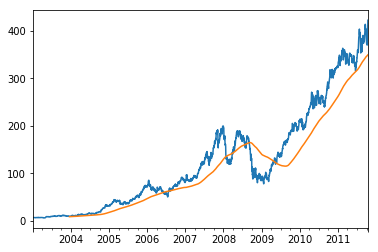

In [192]:
df7.AAPL.plot()
df7.AAPL.rolling(250).mean().plot()

2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
Freq: B, Name: AAPL, dtype: float64

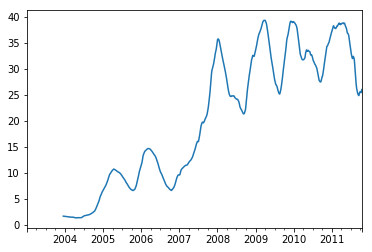

In [211]:
df7.AAPL.rolling(250).std().plot() # 前面249个是NAN
df8 = df7.AAPL.rolling(250,min_periods = 10).std()
df8[:10] # min_peirods 最小观测窗口

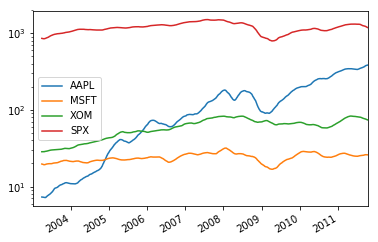

In [213]:
df5.rolling(60).mean().plot(logy = True)

In [225]:
df6[:60]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


In [229]:
df6.rolling('60D').mean().info() # 此时min_periods 默认就是1D

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 3 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
dtypes: float64(3)
memory usage: 149.2 KB


In [232]:
appl = df6.AAPL['2006':'2007']
s7 = appl.rolling(30).mean()
s8 = appl.ewm(span = 30).mean() 

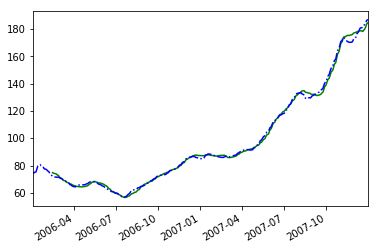

In [240]:
s7.plot(color = 'g',linestyle = '-')
s8.plot(color = 'b',linestyle = '-.')

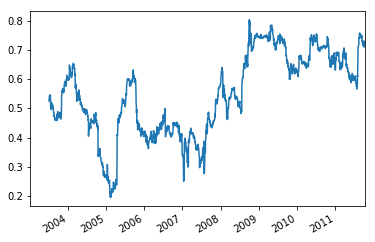

In [242]:
spx = df5.SPX
spx_pct = spx.pct_change()
corr = df6.AAPL.pct_change().rolling(125).corr(spx_pct)
corr.plot()

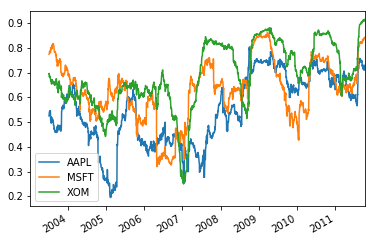

In [244]:
df6.pct_change().rolling(125).corr(spx_pct).plot() # 相关性

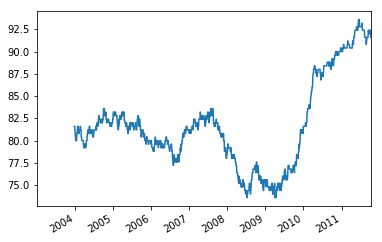

In [247]:
from scipy.stats import percentileofscore
f5 = lambda x :percentileofscore(x,0.02) # 一个array_like中小于0.02所占的比例，
                                         # 默认：等于的数只取一半
df6.AAPL.pct_change().rolling(250).apply(f5).plot()  